In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import re
from __future__ import division  #needed for eval to divide fractions to float instead of integer default of Python v<3

%matplotlib inline
plt.style.use = 'default'
plt.rcParams['figure.figsize'] = (10, 10)

### Import data files

In [2]:
path = 'data/'
filenameC_LC = 'postSurvey_orderLC_dataC.csv'
filenameL_LC = 'postSurvey_orderLC_dataL.csv'
filenameC_CL = 'postSurvey_orderCL_dataC.csv'
filenameL_CL = 'postSurvey_orderCL_dataL.csv'
filenameL_ans = 'postSurvey_L_answerKey.csv'
filenameC_ans = 'postSurvey_C_answerKey.csv'

dfC_LC_raw = pd.read_csv(path + filenameC_LC, delimiter='\t', encoding='utf-16')
dfC_CL_raw = pd.read_csv(path + filenameC_CL, delimiter='\t', encoding='utf-16')
dfL_LC_raw = pd.read_csv(path + filenameL_LC, delimiter='\t', encoding='utf-16')
dfL_CL_raw = pd.read_csv(path + filenameL_CL, delimiter='\t', encoding='utf-16')
dfL_ans_raw = pd.read_csv(path + filenameL_ans, delimiter='\t', encoding='utf-16')
dfC_ans_raw = pd.read_csv(path + filenameC_ans, delimiter='\t', encoding='utf-16')

### Filter out only post-assessment data and rename columns

In [3]:
def filter_df( df, pattern, new_headers ):
    headers = list(df)
    filtered_headers = [header for header in headers if re.match(pattern, header)]
    df2 = df[ filtered_headers ]
    newcolnames = {header : new_header for (header, new_header) in zip(filtered_headers, new_headers)}
    df2.rename(columns=newcolnames, inplace=True)
    return df2

#pick out only column that match student ID, qual or quant questions
other_pattern = '\[id\]'
qual_pattern = '\[qual[0-9]\]'
quant_pattern = '\[quant\.[0-9]'  #specify number in regex only needed in case we only want certain specific Qs
pattern = other_pattern + '|' + qual_pattern + '|' + quant_pattern

#pick out new names for the columns that will be picked from above patterns
other_colnames = ['id']
qual_colnames = ['qual1','qual2','qual3','qual4','qual5','qual6']
quant_colnames = ['quant1','quant2','quant3','quant4']
colnames = other_colnames + qual_colnames + quant_colnames

#filter and rename capacitor dataframe
dfC_LC = filter_df( dfC_LC_raw, pattern, colnames )
dfC_LC.loc[:,'condition'] = pd.Series('LC', index=dfC_LC.index) #add column for condition i.e. if C was first or last
dfC_CL = filter_df( dfC_CL_raw, pattern, colnames )
dfC_CL.loc[:,'condition'] = pd.Series('CL', index=dfC_CL.index)
dfC = pd.concat([dfC_LC, dfC_CL], ignore_index=True)
# dfC=dfC.set_index('id')  #this is for setting ID as row index
# dfC.index.name = None
print dfC.shape

#filter and rename light absorbance dataframe
dfL_LC = filter_df( dfL_LC_raw, pattern, colnames )
dfL_LC.loc[:,'condition'] = pd.Series('LC', index=dfL_LC.index) #add column for condition i.e. if L was first or last
dfL_CL = filter_df( dfL_CL_raw, pattern, colnames )
dfL_CL.loc[:,'condition'] = pd.Series('CL', index=dfL_CL.index)
dfL = pd.concat([dfL_LC, dfL_CL], ignore_index=True)
# dfL=dfL.set_index('id')  #this is for setting ID as row index
# dfL.index.name = None
print dfL.shape

#filter and rename answer key dataframes
dfC_quant_ans = filter_df( dfC_ans_raw, quant_pattern, quant_colnames )
dfC_qual_ans = filter_df( dfC_ans_raw, qual_pattern, qual_colnames )
dfC_ans = pd.concat([dfC_qual_ans, dfC_quant_ans], axis=1)
print dfC_ans.shape

dfL_quant_ans = filter_df( dfL_ans_raw, quant_pattern, quant_colnames )
dfL_qual_ans = filter_df( dfL_ans_raw, qual_pattern, qual_colnames )
dfL_ans = pd.concat([dfL_qual_ans, dfL_quant_ans], axis=1)
print dfL_ans.shape


# df.dtypes  #find what type is each column
# # find bad student IDs to fix  
# # need to check validity of ID --> needs to start with one, or too few characters needs to be checked.
# print set(dfC['id'])-set(dfL['id']) 
# print set(dfL['id'])-set(dfC['id'])
# # this finds duplicate entries
IDcounts = Counter(list(dfL['id']))
duplicates=[ID for ID in IDcounts if IDcounts[ID]>1]
# dfL[ dfL['id'] == duplicates ]  #examine duplicates
# dfL.set_value(73, 'id', 23784336) #change ID for one of the duplicates assuming different dates.
dfL = dfL[ dfL['id'] != duplicates ] #remove duplicates
# dfL.reset_index(level=0, drop=True)
dfC = dfC[ dfC['id'] != duplicates ] #remove duplicates
# dfC.reset_index(level=0, drop=True) #reset index after dropping duplicates
#dfL.drop_duplicates(...)  could also use this method

# # merge C and L results in one dataframe
# df = pd.merge(dfC, dfL, on=['id','condition'], how='outer', suffixes=('_C', '_L'))
# # move condition column before data results
# cols = list(df)
# cols.remove('condition')
# cols.insert(1, 'condition')
# df = df[cols]
# df['id'] = df['id'].astype(int) # <-- this shouldn't be needed but check!
# # create new column for bad IDs that were fixed so that we can track with sim + handouts
# # df.loc[:,'id_flag'] = pd.Series(0, index=df.index)
# # for student in flag_student_IDs:
# #     df[df['id']==student]['id_flag']=1 



/Users/jonathanma/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)
/Users/jonathanma/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/jonathanma/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.or

(107, 12)
(107, 12)
(1, 10)
(1, 10)


In [4]:
dfC_ans.dtypes

qual1      object
qual2      object
qual3      object
qual4      object
qual5      object
qual6      object
quant1    float64
quant2    float64
quant3      int64
quant4    float64
dtype: object

### Grade quant questions

In [5]:
idx = dfL[dfL['id']==11200165].index.tolist()[0]
# print dfL[dfL['id']==11200165]['quant2']
print dfL.loc[idx]['qual2']
# dfL[dfL['id']==11200165]

 (https://survey.ubc.ca/media/assets/groups/5494/Notenoughinfo.png)


In [6]:
#create grading function for qualitative Qs
def grade_qual_questions( df, df_ans, questions, id_header, ReportWrong = False ):
    students = df[id_header]
    for student in students:
        for question in questions:
            idx = df[df['id']==student].index.tolist()[0]
            if df.loc[idx][question] == df_ans.loc[0][question]:
                df.set_value(idx, question + '_score', 1)
            else:
                df.set_value(idx, question + '_score', 0)
                if ReportWrong:
                    print question, student
                    print df[df['id']==student][question].values
                    print df_ans[question].values, '\n'

grade_qual_questions( dfL, dfL_ans, qual_colnames, 'id' )
grade_qual_questions( dfC, dfC_ans, qual_colnames, 'id' )

In [7]:
dfL.head()

,id,qual1,qual2,qual3,qual4,qual5,qual6,quant1,quant2,quant3,quant4,condition,qual1_score,qual2_score,qual3_score,qual4_score,qual5_score,qual6_score
0,12818156,high concentration (https://survey.ubc.ca/medi...,"high concentration, low volume (https://survey...",big beaker (https://survey.ubc.ca/media/assets...,(https://survey.ubc.ca/media/assets/groups/54...,(https://survey.ubc.ca/media/assets/groups/54...,red laser beam (https://survey.ubc.ca/media/as...,0.1,0.4,0.8,0.2,LC,1.0,1.0,1.0,1.0,0.0,1.0
1,11200165,high concentration (https://survey.ubc.ca/medi...,(https://survey.ubc.ca/media/assets/groups/54...,big beaker (https://survey.ubc.ca/media/assets...,(https://survey.ubc.ca/media/assets/groups/54...,(https://survey.ubc.ca/media/assets/groups/54...,red laser beam (https://survey.ubc.ca/media/as...,0.1,0.4,0.4,0.2,LC,1.0,0.0,1.0,1.0,0.0,1.0
2,77047160,high concentration (https://survey.ubc.ca/medi...,"high concentration, low volume (https://survey...",big beaker (https://survey.ubc.ca/media/assets...,(https://survey.ubc.ca/media/assets/groups/54...,angled laser beam (https://survey.ubc.ca/media...,red laser beam (https://survey.ubc.ca/media/as...,0.1,0.4,0.8,0.2,LC,1.0,1.0,1.0,1.0,1.0,1.0
3,64006159,low concentration (https://survey.ubc.ca/media...,"low concentration, high volume (https://survey...",small beaker (https://survey.ubc.ca/media/asse...,(https://survey.ubc.ca/media/assets/groups/54...,(https://survey.ubc.ca/media/assets/groups/54...,blue laser beam (https://survey.ubc.ca/media/a...,highrer than 0.2,lower than 0.2,lower than 0.2,lower than 0.2,LC,0.0,0.0,0.0,0.0,0.0,0.0
4,27451164,high concentration (https://survey.ubc.ca/medi...,"high concentration, low volume (https://survey...",big beaker (https://survey.ubc.ca/media/assets...,(https://survey.ubc.ca/media/assets/groups/54...,(https://survey.ubc.ca/media/assets/groups/54...,red laser beam (https://survey.ubc.ca/media/as...,0.1,0.4,0.8,0.3,LC,1.0,1.0,1.0,1.0,0.0,1.0


In [20]:
#create grading function for quant Qs
def is_number( string ):
    try:
        float( eval( re.sub('[pPcC]', '', string) )) #this evaluates fractions and strips units
        return True
    except:
        return False

def make_number( string ):
    return float( eval( re.sub('[pPcC]', '', string) ))

def grade_quant_questions( df, df_ans, questions, id_header, ReportWrong = False, ManualGrade = False ):
    students = df[id_header]
    for question in questions:
        for student in students:
            idx = df[df['id']==student].index.tolist()[0]
            student_ans = df.loc[idx][question]
            correct_ans = df_ans.loc[0][question]
            if is_number( student_ans ):
                if make_number( student_ans ) == correct_ans:
                    df.set_value(idx, question + '_score', 2)
                else:
                    df.set_value(idx, question + '_score', 0)
                    if ReportWrong:
                        print question, student
                        print student_ans, correct_ans, '\n',
            else:
                # if ManualGrade == False then no value is set and score is NaN
                if ManualGrade:
                    print question, student, '->', student_ans, '| ans =', correct_ans, '| manual score = ',
                    manual_score = input()
                    df.set_value(idx, question + '_score', manual_score)

grade_quant_questions( dfL, dfL_ans, quant_colnames, 'id', ManualGrade = True )


 quant1 64006159 -> highrer than 0.2 | ans = 0.1 | manual score = 0
 quant1 59043165 -> decrease | ans = 0.1 | manual score = 1
 quant1 89047164 -> same | ans = 0.1 | manual score = 0
 quant1 55825144 -> lower | ans = 0.1 | manual score = 1
 quant1 15072160 -> absorbance would decrease | ans = 0.1 | manual score = 1
 quant1 19562150 -> smaller | ans = 0.1 | manual score = 1
 quant1 13654167 -> double maybe | ans = 0.1 | manual score = 0
 quant1 17595160 -> less than 0.2 | ans = 0.1 | manual score = 1
 quant1 11892169 -> lower | ans = 0.1 | manual score = 1
 quant1 15444164 -> increase | ans = 0.1 | manual score = 0
 quant1 17007153 -> lower ( around 0.1) | ans = 0.1 | manual score = 1
 quant1 15188167 -> less than 0.2 | ans = 0.1 | manual score = 1
 quant1 13122150 -> 0.1?? I am not sure because I didn't finish the experiment but definately smaller than 0.2 | ans = 0.1 | manual score = 1
 quant1 26984162 -> Half the absorbance | ans = 0.1 | manual score = 2
 quant2 64006159 -> lower th

In [21]:
dfL.head(20)

,id,qual1,qual2,qual3,qual4,qual5,qual6,quant1,quant2,quant3,...,qual1_score,qual2_score,qual3_score,qual4_score,qual5_score,qual6_score,quant1_score,quant2_score,quant3_score,quant4_score
0,12818156,high concentration (https://survey.ubc.ca/medi...,"high concentration, low volume (https://survey...",big beaker (https://survey.ubc.ca/media/assets...,(https://survey.ubc.ca/media/assets/groups/54...,(https://survey.ubc.ca/media/assets/groups/54...,red laser beam (https://survey.ubc.ca/media/as...,0.1,0.4,0.8,...,1.0,1.0,1.0,1.0,0.0,1.0,2.0,2.0,2.0,2.0
1,11200165,high concentration (https://survey.ubc.ca/medi...,(https://survey.ubc.ca/media/assets/groups/54...,big beaker (https://survey.ubc.ca/media/assets...,(https://survey.ubc.ca/media/assets/groups/54...,(https://survey.ubc.ca/media/assets/groups/54...,red laser beam (https://survey.ubc.ca/media/as...,0.1,0.4,0.4,...,1.0,0.0,1.0,1.0,0.0,1.0,2.0,2.0,0.0,2.0
2,77047160,high concentration (https://survey.ubc.ca/medi...,"high concentration, low volume (https://survey...",big beaker (https://survey.ubc.ca/media/assets...,(https://survey.ubc.ca/media/assets/groups/54...,angled laser beam (https://survey.ubc.ca/media...,red laser beam (https://survey.ubc.ca/media/as...,0.1,0.4,0.8,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0
3,64006159,low concentration (https://survey.ubc.ca/media...,"low concentration, high volume (https://survey...",small beaker (https://survey.ubc.ca/media/asse...,(https://survey.ubc.ca/media/assets/groups/54...,(https://survey.ubc.ca/media/assets/groups/54...,blue laser beam (https://survey.ubc.ca/media/a...,highrer than 0.2,lower than 0.2,lower than 0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,27451164,high concentration (https://survey.ubc.ca/medi...,"high concentration, low volume (https://survey...",big beaker (https://survey.ubc.ca/media/assets...,(https://survey.ubc.ca/media/assets/groups/54...,(https://survey.ubc.ca/media/assets/groups/54...,red laser beam (https://survey.ubc.ca/media/as...,0.1,0.4,0.8,...,1.0,1.0,1.0,1.0,0.0,1.0,2.0,2.0,2.0,0.0
5,90447168,high concentration (https://survey.ubc.ca/medi...,"high concentration, low volume (https://survey...",big beaker (https://survey.ubc.ca/media/assets...,(https://survey.ubc.ca/media/assets/groups/54...,horizontal laser beam (https://survey.ubc.ca/m...,red laser beam (https://survey.ubc.ca/media/as...,0.1,0.3,0.5,...,1.0,1.0,1.0,1.0,0.0,1.0,2.0,0.0,0.0,2.0
6,46792161,high concentration (https://survey.ubc.ca/medi...,"high concentration, low volume (https://survey...",big beaker (https://survey.ubc.ca/media/assets...,(https://survey.ubc.ca/media/assets/groups/54...,angled laser beam (https://survey.ubc.ca/media...,red laser beam (https://survey.ubc.ca/media/as...,0.1,0.4,0.8,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0
7,24511163,high concentration (https://survey.ubc.ca/medi...,(https://survey.ubc.ca/media/assets/groups/54...,big beaker (https://survey.ubc.ca/media/assets...,(https://survey.ubc.ca/media/assets/groups/54...,horizontal laser beam (https://survey.ubc.ca/m...,red laser beam (https://survey.ubc.ca/media/as...,0.1,0.4,0.8,...,1.0,0.0,1.0,1.0,0.0,1.0,2.0,2.0,2.0,2.0
8,31607164,high concentration (https://survey.ubc.ca/medi...,"high concentration, low volume (https://survey...",big beaker (https://survey.ubc.ca/media/assets...,(https://survey.ubc.ca/media/assets/groups/54...,angled laser beam (https://survey.ubc.ca/media...,blue laser beam (https://survey.ubc.ca/media/a...,0.4,0.1,0.1,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
9,59043165,high concentration (https://survey.ubc.ca/medi...,"high concentration, low volume (https://survey...",big beaker (https://survey.ubc.ca/media/assets...,(https://survey.ubc.ca/media/assets/groups/54...,horizontal laser beam (https://survey.ubc.ca/m...,red laser beam (https://survey.ubc.ca/media/as...,decrease,increase,increase x4,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0,0.0


In [11]:
a = input()
print a

234
234


                 id  qual1_score  qual2_score  qual3_score  qual4_score  \
count  1.050000e+02   105.000000   105.000000   105.000000   105.000000   
mean   2.533408e+07     0.971429     0.761905     0.923810     0.752381   
std    2.202670e+07     0.167398     0.427960     0.266575     0.433699   
min    1.921680e+05     0.000000     0.000000     0.000000     0.000000   
25%    1.313916e+07     1.000000     1.000000     1.000000     1.000000   
50%    1.707117e+07     1.000000     1.000000     1.000000     1.000000   
75%    2.234017e+07     1.000000     1.000000     1.000000     1.000000   
max    9.044717e+07     1.000000     1.000000     1.000000     1.000000   

       qual5_score  qual6_score  quant1_score  quant2_score  quant3_score  \
count   105.000000   105.000000    105.000000    105.000000    105.000000   
mean      0.600000     0.657143      1.571429      1.504762      1.419048   
std       0.492248     0.476941      0.770329      0.810078      0.852383   
min       0.0000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115fc4b90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11715d4d0>]], dtype=object)

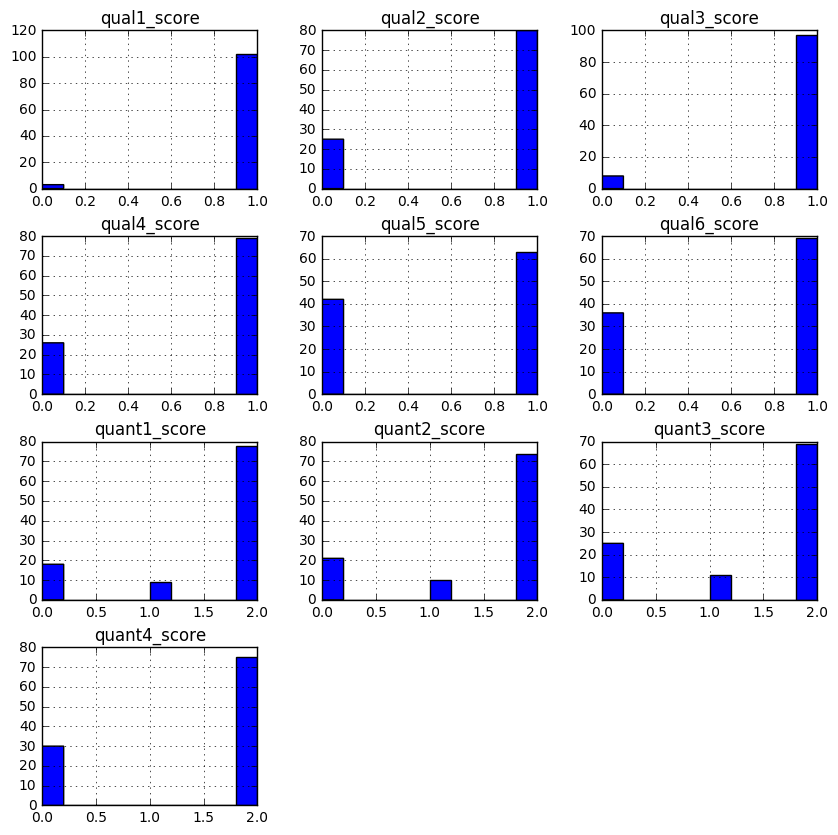

In [29]:
scoredQs = [colname + '_score' for colname in qual_colnames + quant_colnames]
print(dfL.describe())
dfL[scoredQs].hist()